# Sample Specific Model Performance - Cross-Entropy and Correlation

In [1]:
from unsampled import *
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from scipy.stats.stats import pearsonr
import scipy.stats as stats

### Load Trees

In [2]:
t1 = Tree.get(path="data/tree1.nex", schema="nexus")
rd.seed(100) #for replicability
pruned_dict_t1 = randomly_prune_tree(t1, .95)
popsize = 1

#matrix of observed and expected attachemt to each edge in the pruned tree for each dropped sample
exp_t1 = theoretical_attachment_prob_matrix(pruned_dict_t1.get('full_tree'), pruned_dict_t1.get('pruned_tree'), pruned_dict_t1.get('root_reference'), 
                                   popsize, pruned_dict_t1.get('node_root_dist_full_tree'), pruned_dict_t1.get('dropped_samples'))
obs_t1 = observed_attachment_prob_matrix(pruned_dict_t1.get('full_tree'), pruned_dict_t1.get('pruned_tree'), pruned_dict_t1.get('dropped_samples'))

In [3]:
t2 = Tree.get(path="data/tree2.nex", schema="nexus")
rd.seed(100) #for replicability
pruned_dict_t2 = randomly_prune_tree(t2, .95)
popsize = 1

#matrix of observed and expected attachemt to each edge in the pruned tree for each dropped sample
exp_t2 = theoretical_attachment_prob_matrix(pruned_dict_t2.get('full_tree'), pruned_dict_t2.get('pruned_tree'), pruned_dict_t2.get('root_reference'), 
                                   popsize, pruned_dict_t2.get('node_root_dist_full_tree'), pruned_dict_t2.get('dropped_samples'))
obs_t2 = observed_attachment_prob_matrix(pruned_dict_t2.get('full_tree'), pruned_dict_t2.get('pruned_tree'), pruned_dict_t2.get('dropped_samples'))

In [4]:
t3 = Tree.get(path="data/tree3.nex", schema="nexus")
rd.seed(100) #for replicability
pruned_dict_t3 = randomly_prune_tree(t3, .95)
popsize = 1

#matrix of observed and expected attachemt to each edge in the pruned tree for each dropped sample
exp_t3 = theoretical_attachment_prob_matrix(pruned_dict_t3.get('full_tree'), pruned_dict_t3.get('pruned_tree'), pruned_dict_t3.get('root_reference'), 
                                   popsize, pruned_dict_t3.get('node_root_dist_full_tree'), pruned_dict_t3.get('dropped_samples'))
obs_t3 = observed_attachment_prob_matrix(pruned_dict_t3.get('full_tree'), pruned_dict_t3.get('pruned_tree'), pruned_dict_t3.get('dropped_samples'))

In [5]:
t4 = Tree.get(path="data/tree4.nex", schema="nexus")
rd.seed(100) #for replicability
pruned_dict_t4 = randomly_prune_tree(t4, .95)
popsize = 1

#matrix of observed and expected attachemt to each edge in the pruned tree for each dropped sample
exp_t4 = theoretical_attachment_prob_matrix(pruned_dict_t4.get('full_tree'), pruned_dict_t4.get('pruned_tree'), pruned_dict_t4.get('root_reference'), 
                                   popsize, pruned_dict_t4.get('node_root_dist_full_tree'), pruned_dict_t4.get('dropped_samples'))
obs_t4 = observed_attachment_prob_matrix(pruned_dict_t4.get('full_tree'), pruned_dict_t4.get('pruned_tree'), pruned_dict_t4.get('dropped_samples'))

In [6]:
t5 = Tree.get(path="data/tree5.nex", schema="nexus")
rd.seed(100) #for replicability
pruned_dict_t5 = randomly_prune_tree(t5, .95)
popsize = 1

#matrix of observed and expected attachemt to each edge in the pruned tree for each dropped sample
exp_t5 = theoretical_attachment_prob_matrix(pruned_dict_t5.get('full_tree'), pruned_dict_t5.get('pruned_tree'), pruned_dict_t5.get('root_reference'), 
                                   popsize, pruned_dict_t5.get('node_root_dist_full_tree'), pruned_dict_t5.get('dropped_samples'))
obs_t5 = observed_attachment_prob_matrix(pruned_dict_t5.get('full_tree'), pruned_dict_t5.get('pruned_tree'), pruned_dict_t5.get('dropped_samples'))

## Node Impurity: Categorical Cross-Entropy

Categorical cross entropy is used to measure classification error as compared to a null model. It can be defined as:
$$H(p,q) = - \sum_{i=0}^k p_i \cdot log(q_i)$$
where $p$ corresponds to the one hot encoding of our known, observed probability distribution (in our case each sample attaches at exactly one place and so the row will have 0s and one 1 at the index corresponding to the branch). $q$ is the expected distribution calculated across the $k$ categories.

Entropy is minimized and we seek to outperform the null which was created by giving each possible edge an equal probability of attachment.

### Null 1: Model Created with Equal Probability of Attachment Across Each Branch

In [7]:
#Cross-Entropy calculation (independent of the tree, only depends on the number of samples in the tree)
null_entropy = -1*math.log(1.0/(obs_t1.shape[1]))*obs_t1.shape[0]
print "null model entropy:", null_entropy

null model entropy: 7755.4234294


### Null 2: Model Created with Equal Probability of Attachement Across All Areas

#### Tree 1
null model creation (depends on the tree branch lengths)

In [8]:
ttl = 0
for nd in pruned_dict_t1.get('pruned_tree').nodes():
    if nd.edge_length is not None:
        ttl += nd.edge_length
null_2_t1 = []
for nd in pruned_dict_t1.get('pruned_tree').nodes():
    if nd.edge_length is not None:
        null_2_t1.append(nd.edge_length/ttl)
    else:
        null_2_t1.append(0.0)

In [9]:
null2_entropy_t1 = []

for row_o in obs_t1:
    p_mk = null_2_t1[list(row_o).index(1.0)]
    ent =  math.log(p_mk)
    null2_entropy_t1.append(-1*ent)
print "total entropy:", sum(null2_entropy_t1)

total entropy: 7618.83327942


In [10]:
single_sample_null2_entropy_t1 = np.mean(null2_entropy_t1)
print "entropy of a single sample created under the null:",  single_sample_null2_entropy_t1

entropy of a single sample created under the null: 4.97962959439


#### Tree 2

In [11]:
ttl = 0
for nd in pruned_dict_t2.get('pruned_tree').nodes():
    if nd.edge_length is not None:
        ttl += nd.edge_length
null_2_t2 = []
for nd in pruned_dict_t2.get('pruned_tree').nodes():
    if nd.edge_length is not None:
        null_2_t2.append(nd.edge_length/ttl)
    else:
        null_2_t2.append(0.0)

In [12]:
null2_entropy_t2 = []

for row_o in obs_t2:
    p_mk = null_2_t2[list(row_o).index(1.0)]
    ent =  math.log(p_mk)
    null2_entropy_t2.append(-1*ent)
print "total entropy:", sum(null2_entropy_t2)

total entropy: 7847.62769337


In [13]:
single_sample_null2_entropy_t2= np.mean(null2_entropy_t2)
print "entropy of a single sample created under the null:",  single_sample_null2_entropy_t2

entropy of a single sample created under the null: 5.12916842704


#### Tree 3

In [14]:
ttl = 0
for nd in pruned_dict_t3.get('pruned_tree').nodes():
    if nd.edge_length is not None:
        ttl += nd.edge_length
null_2_t3 = []
for nd in pruned_dict_t3.get('pruned_tree').nodes():
    if nd.edge_length is not None:
        null_2_t3.append(nd.edge_length/ttl)
    else:
        null_2_t3.append(0.0)

In [15]:
null2_entropy_t3 = []

for row_o in obs_t3:
    p_mk = null_2_t3[list(row_o).index(1.0)]
    ent =  math.log(p_mk)
    null2_entropy_t3.append(-1*ent)
print "total entropy:", sum(null2_entropy_t3)

total entropy: 7960.9507799


In [16]:
single_sample_null2_entropy_t3 = np.mean(null2_entropy_t3)
print "entropy of a single sample created under the null:",  single_sample_null2_entropy_t3

entropy of a single sample created under the null: 5.20323580386


#### Tree 4

In [17]:
ttl = 0
for nd in pruned_dict_t4.get('pruned_tree').nodes():
    if nd.edge_length is not None:
        ttl += nd.edge_length
null_2_t4 = []
for nd in pruned_dict_t4.get('pruned_tree').nodes():
    if nd.edge_length is not None:
        null_2_t4.append(nd.edge_length/ttl)
    else:
        null_2_t4.append(0.0)

In [18]:
null2_entropy_t4 = []

for row_o in obs_t4:
    p_mk = null_2_t4[list(row_o).index(1.0)]
    ent =  math.log(p_mk)
    null2_entropy_t4.append(-1*ent)
print "total entropy:", sum(null2_entropy_t4)

total entropy: 7292.83014729


In [19]:
single_sample_null2_entropy_t4 = np.mean(null2_entropy_t4)
print "entropy of a single sample created under the null:",  single_sample_null2_entropy_t4

entropy of a single sample created under the null: 4.76655565183


#### Treee 5

In [20]:
ttl = 0
for nd in pruned_dict_t5.get('pruned_tree').nodes():
    if nd.edge_length is not None:
        ttl += nd.edge_length
null_2_t5 = []
for nd in pruned_dict_t5.get('pruned_tree').nodes():
    if nd.edge_length is not None:
        null_2_t5.append(nd.edge_length/ttl)
    else:
        null_2_t5.append(0.0)

In [21]:
null2_entropy_t5 = []

for row_o in obs_t5:
    p_mk = null_2_t5[list(row_o).index(1.0)]
    ent =  math.log(p_mk)
    null2_entropy_t5.append(-1*ent)
print "total entropy:", sum(null2_entropy_t5)

total entropy: 7454.74909976


In [22]:
single_sample_null2_entropy_t5 = np.mean(null2_entropy_t5)
print "entropy of a single sample created under the null:",  single_sample_null2_entropy_t5

entropy of a single sample created under the null: 4.87238503252


#### Example plot of correlation between expected and observed attachment to each branch for the null model #2 for tree 1

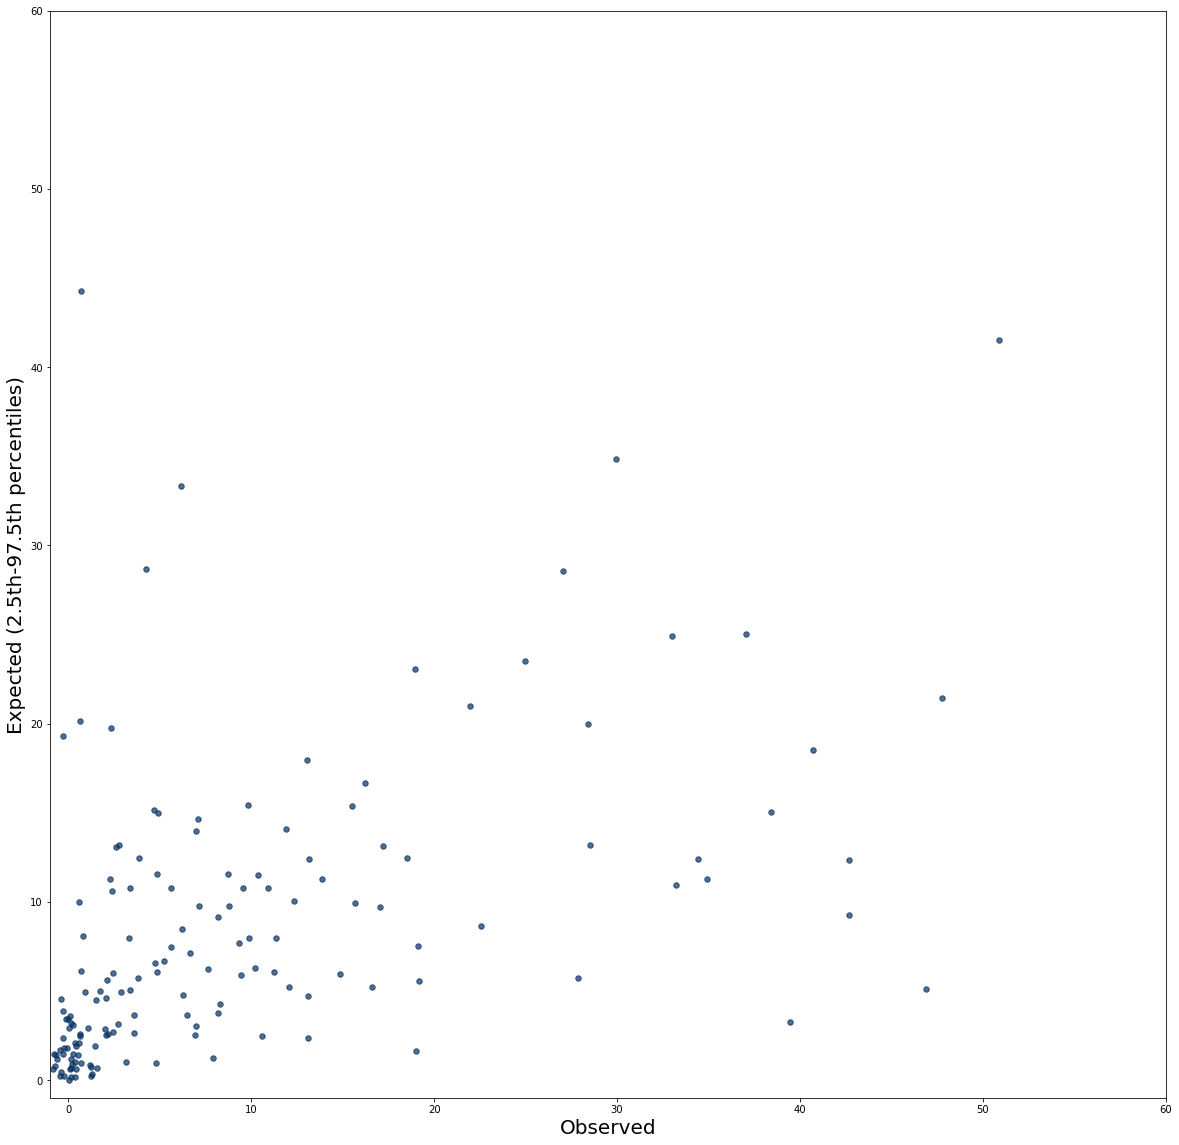

In [23]:
n2 = [prb*obs_t1.shape[0] for prb in null_2_t1]
obs_sum_att = list(sum(obs_t1)) #column sums
not_captured = 0
def rand_jitter(arr):
    stdev = .005*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

obs_sum_att_2 = rand_jitter(obs_sum_att)

fig,ax = plt.subplots(figsize=(20,20),facecolor='w')
for cur_exp, cur_obs, j_cur_obs in zip(n2, obs_sum_att, obs_sum_att_2):
    c='#053061'
    ax.scatter(j_cur_obs,cur_exp,s=30,facecolor=c,edgecolor=c, alpha = .7)

ax.set_xlabel('Observed', fontsize = 20)
ax.set_ylabel('Expected (2.5th-97.5th percentiles)', fontsize = 20)
ax.set_ylim(-1, 60) 
ax.set_xlim(-1, 60) 
#fig.savefig('correlation-percentiles.png', bbox_inches = 'tight', transparent = True)
plt.show()

In [24]:
#correlation coeffient. Weak positive linear relationship
pearsonr(n2, obs_sum_att)

(0.27101554407608519, 0.00054966145672295124)

### Model Entropy

#### Tree 1

In [25]:
total_entropy_t1 = []

for row_o, row_e in zip(obs_t1, exp_t1):
    p_mk = list(row_e)[list(row_o).index(1.0)]
    ent =  math.log(p_mk)
    total_entropy_t1.append(-1*ent)
print "total entropy:", sum(total_entropy_t1)

total entropy: 5231.07783374


In [26]:
average_entropy_t1 = np.mean(total_entropy_t1) #avg entropy
print "average sample entropy:",  average_entropy_t1

average sample entropy: 3.41900512009


#### Tree 2

In [27]:
total_entropy_t2 = []

for row_o, row_e in zip(obs_t2, exp_t2):
    p_mk = list(row_e)[list(row_o).index(1.0)]
    ent =  math.log(p_mk)
    total_entropy_t2.append(-1*ent)
print "total entropy:", sum(total_entropy_t2)

total entropy: 6011.6983685


In [28]:
average_entropy_t2 = np.mean(total_entropy_t2) #avg entropy
print "average sample entropy:",  average_entropy_t2

average sample entropy: 3.92921461993


#### Tree 3

In [29]:
total_entropy_t3 = []

for row_o, row_e in zip(obs_t3, exp_t3):
    p_mk = list(row_e)[list(row_o).index(1.0)]
    ent =  math.log(p_mk)
    total_entropy_t3.append(-1*ent)
print "total entropy:", sum(total_entropy_t3)

total entropy: 5836.05008808


In [30]:
average_entropy_t3 = np.mean(total_entropy_t3) #avg entropy
print "average sample entropy:",  average_entropy_t3

average sample entropy: 3.81441182228


#### Tree 4

In [31]:
total_entropy_t4 = []

for row_o, row_e in zip(obs_t4, exp_t4):
    p_mk = list(row_e)[list(row_o).index(1.0)]
    ent =  math.log(p_mk)
    total_entropy_t4.append(-1*ent)
print "total entropy:", sum(total_entropy_t4)

total entropy: 4994.67069467


In [32]:
average_entropy_t4 = np.mean(total_entropy_t4) #avg entropy
print "average sample entropy:",  average_entropy_t4

average sample entropy: 3.26449065011


#### Tree 5

In [33]:
total_entropy_t5 = []

for row_o, row_e in zip(obs_t5, exp_t5):
    p_mk = list(row_e)[list(row_o).index(1.0)]
    ent =  math.log(p_mk)
    total_entropy_t5.append(-1*ent)
print "total entropy:", sum(total_entropy_t5)

total entropy: 5855.03944269


In [34]:
average_entropy_t5 = np.mean(total_entropy_t5) #avg entropy
print "average sample entropy:",  average_entropy_t5

average sample entropy: 3.82682316516


### Overall Correlation Coefficients

In [35]:
exp_sum_att_t1 = list(sum(exp_t1)) #column sums
obs_sum_att_t1 = list(sum(obs_t1)) #column sums
print " Correlation coefficient:", pearsonr(exp_sum_att_t1, obs_sum_att_t1)[0], "test of significance finds p = ", pearsonr(exp_sum_att_t1, obs_sum_att_t1)[-1]

 Correlation coefficient: 0.627288988774 test of significance finds p =  9.00356412626e-19


In [36]:
exp_sum_att_t2 = list(sum(exp_t2)) #column sums
obs_sum_att_t2 = list(sum(obs_t2)) #column sums
print " Correlation coefficient:", pearsonr(exp_sum_att_t2, obs_sum_att_t2)[0], "test of significance finds p = ", pearsonr(exp_sum_att_t2, obs_sum_att_t2)[-1]

 Correlation coefficient: 0.650063307958 test of significance finds p =  1.83509578992e-20


In [37]:
exp_sum_att_t3 = list(sum(exp_t3)) #column sums
obs_sum_att_t3 = list(sum(obs_t3)) #column sums
print " Correlation coefficient:", pearsonr(exp_sum_att_t3, obs_sum_att_t3)[0], "test of significance finds p = ", pearsonr(exp_sum_att_t3, obs_sum_att_t3)[-1]

 Correlation coefficient: 0.666703738766 test of significance finds p =  8.5919309469e-22


In [38]:
exp_sum_att_t4 = list(sum(exp_t4)) #column sums
obs_sum_att_t4 = list(sum(obs_t4)) #column sums
print " Correlation coefficient:", pearsonr(exp_sum_att_t4, obs_sum_att_t4)[0], "test of significance finds p = ", pearsonr(exp_sum_att_t4, obs_sum_att_t4)[-1]

 Correlation coefficient: 0.796710289324 test of significance finds p =  3.6645979325e-36


In [39]:
exp_sum_att_t5 = list(sum(exp_t5)) #column sums
obs_sum_att_t5 = list(sum(obs_t5)) #column sums
print " Correlation coefficient:", pearsonr(exp_sum_att_t5, obs_sum_att_t5)[0], "test of significance finds p = ", pearsonr(exp_sum_att_t5, obs_sum_att_t5)[-1]

 Correlation coefficient: 0.702292646134 test of significance finds p =  6.06295733891e-25


### Variance of Expected Data Distribution - Tree 1

Resampling: for each run, resample $n$ = number of dropped samples, the value generated represents the index of attachment where each $n_i$ is sampled from the discrete distribution of its respective expectation calculated under the coalescent. The result of each run is a list with length equal to the number of possible edges to attach to and each value within the list corresponding to the summed total number of samples that series of random draws predicts 

In [40]:
num_runs = 100
edg = len(pruned_dict_t1.get('pruned_tree').edges())
full_counts = np.zeros((num_runs, edg))
rd.seed(10)

for run in range(num_runs):
    for row in exp_t1:
        distr = stats.rv_discrete(values = (range(len(row)), list(row)))
        rv = distr.rvs(size=1)
        full_counts[run][int(rv)] += 1

For each edge, calculates the middle 95 percentiles (2.5th - 97.5th percentile)

In [41]:
#grab the middle 95 percentiles of data for each branch
pct_025 = np.percentile(full_counts, 2.5, axis = 0)
pct_975 = np.percentile(full_counts, 97.5, axis=0)

### Observed versus Expected Sum Attachments

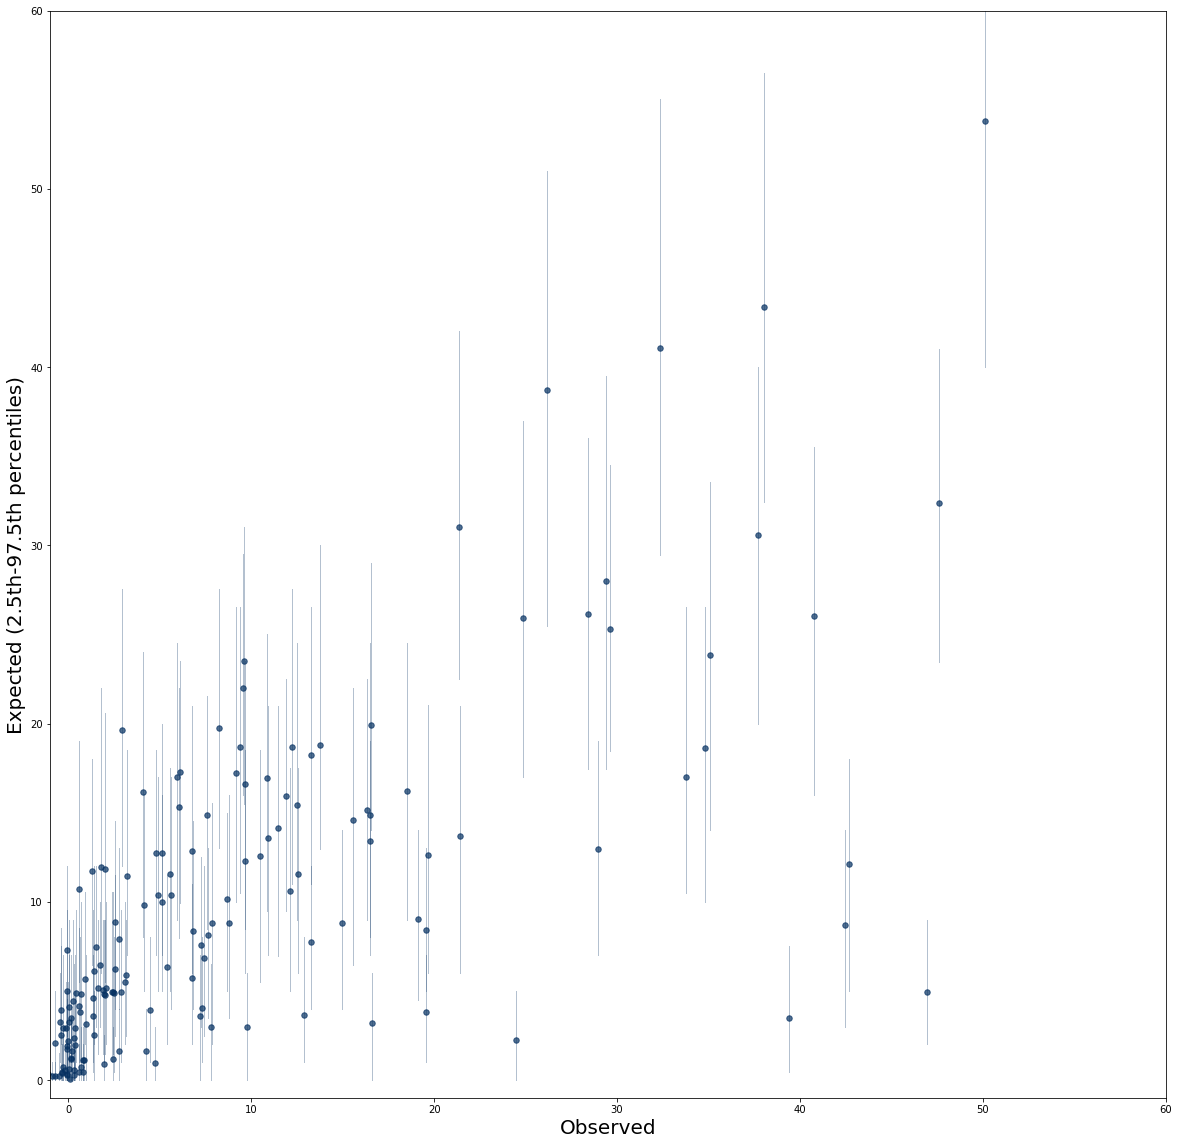

In [42]:
#the summed number of dropped observations expected to fall on each edge (with 2.5th and 97.5th percentiles)
#plotted against that actual observed number of dropped samples attached to each branch
exp_sum_att = list(sum(exp_t1)) #column sums
obs_sum_att = list(sum(obs_t1)) #column sums
not_captured = 0
def rand_jitter(arr):
    stdev = .005*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

obs_sum_att_2 = rand_jitter(obs_sum_att)

fig,ax = plt.subplots(figsize=(20,20),facecolor='w')
for cur_exp, cur_obs, j_cur_obs, lb, ub in zip(exp_sum_att, obs_sum_att, obs_sum_att_2, pct_025, pct_975):
    c= '#053061'
    ax.scatter(j_cur_obs,cur_exp,s=30,facecolor=c,edgecolor=c, alpha = .7)
    ax.plot([j_cur_obs,j_cur_obs],[lb, ub],lw=1, color=c,ls='-', alpha = .3) 

ax.set_xlabel('Observed', fontsize = 20)
ax.set_ylabel('Expected (2.5th-97.5th percentiles)', fontsize = 20)
ax.set_ylim(-1, 60) 
ax.set_xlim(-1, 60) 
#fig.savefig('correlation-percentiles.png', bbox_inches = 'tight', transparent = True)
plt.show()

The line for where the observed = expected number of attachments to a branch is added and all branches where the percentile range from 2.5th to 97.5th covers this line is colored blue. Intervals that do not cover the line are colored red.

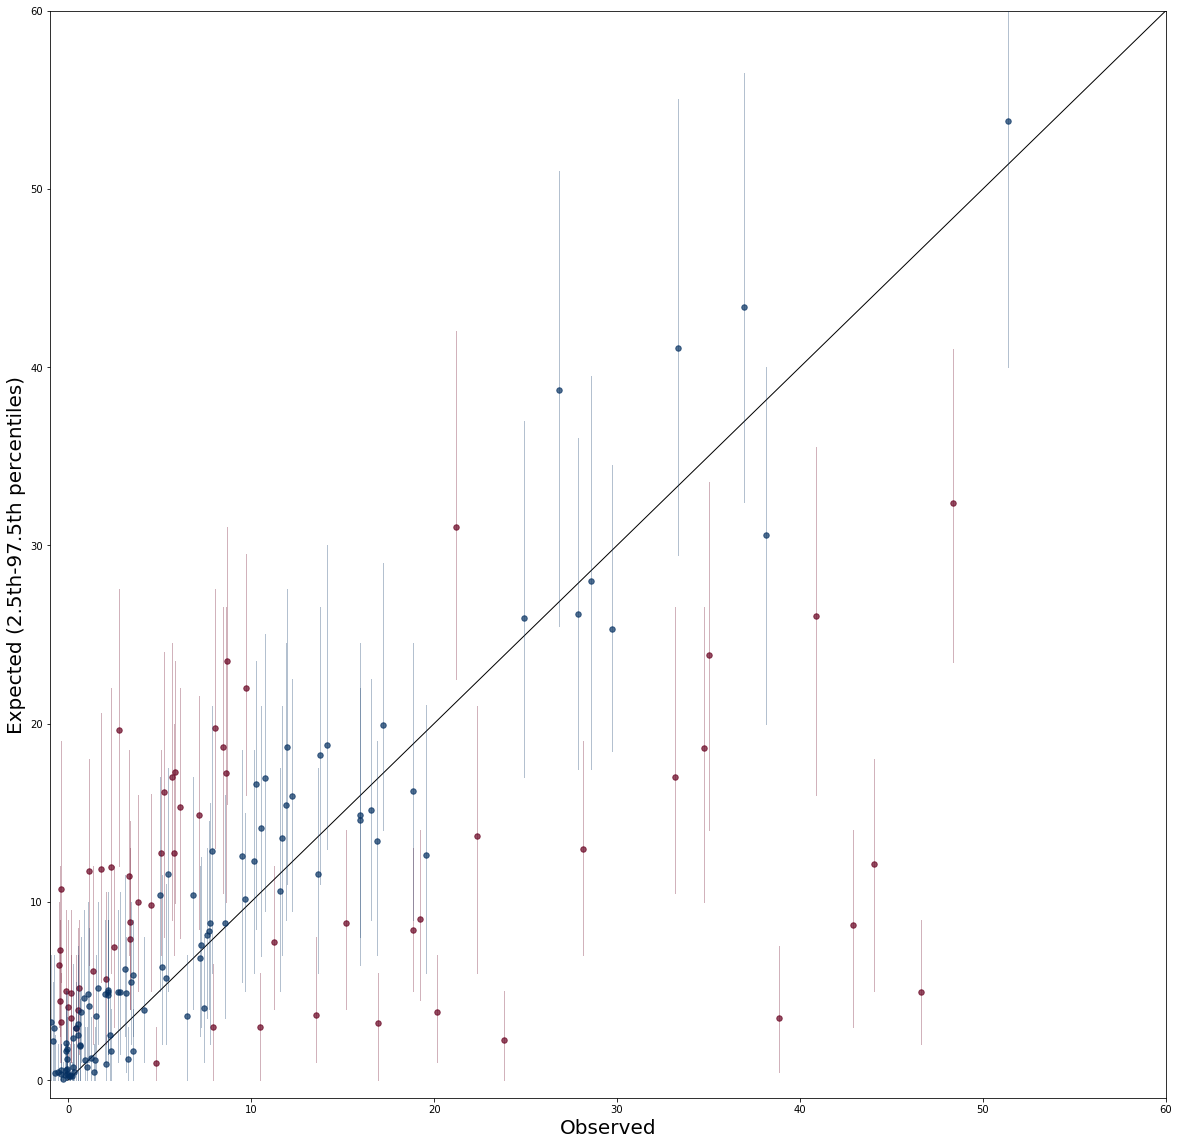

In [43]:
#the summed number of dropped observations expected to fall on each edge (with 2.5th and 97.5th percentiles)
#plotted against that actual observed number of dropped samples attached to each branch
exp_sum_att = list(sum(exp_t1)) #column sums
obs_sum_att = list(sum(obs_t1)) #column sums
not_captured = 0
def rand_jitter(arr):
    stdev = .005*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

obs_sum_att_2 = rand_jitter(obs_sum_att)

fig,ax = plt.subplots(figsize=(20,20),facecolor='w')
for cur_exp, cur_obs, j_cur_obs, lb, ub in zip(exp_sum_att, obs_sum_att, obs_sum_att_2, pct_025, pct_975):
    if cur_obs >= lb and cur_obs <= ub:
        c = '#053061'
        orde = 20
    else:
        not_captured += 1
        c= '#67001f'
        orde = 10
    ax.scatter(j_cur_obs,cur_exp,s=30,facecolor=c,edgecolor=c, alpha = .7, zorder = orde)
    ax.plot([j_cur_obs,j_cur_obs],[lb, ub],lw=1, color=c,ls='-', alpha = .3, zorder = orde) 
    
ax.plot([0,60],[0,60],lw=1, color='k')

ax.set_xlabel('Observed', fontsize = 20)
ax.set_ylabel('Expected (2.5th-97.5th percentiles)', fontsize = 20)
ax.set_ylim(-1, 60) 
ax.set_xlim(-1, 60) 
plt.show()

In [44]:
#percent of samples where the sample's interval does not capture the correct obcerved number of attachments
1-not_captured/float(edg)

0.6226415094339622

## Entropies Across Multiple Levels of Sampling

In [46]:
#for tree 1
samp_props = [.99, .98, .97, .96, .95, .9, .8, .7, .6, .5, .4, .3, .2, .1] #proportion of the samples within a tree to drop
popsize = 1
runs_at_each_level = 10

In [ ]:
#model entropies are hand copied below as a list
rd.seed(100) #for replicability
#model_entropies = []
null1_entropies = []
null2_entropies = []

for prop in samp_props:
    #average_prop_entropies = []
    average_prop_null1 = []
    average_prop_null2 = []
    
    for run in range(runs_at_each_level):
        pruned_dict = randomly_prune_tree(t1, prop)
        #exp = theoretical_attachment_prob_matrix(pruned_dict.get('full_tree'), pruned_dict.get('pruned_tree'), pruned_dict.get('root_reference'), 
        #                                   popsize, pruned_dict.get('node_root_dist_full_tree'), pruned_dict.get('dropped_samples'))
        obs = observed_attachment_prob_matrix(pruned_dict.get('full_tree'), pruned_dict.get('pruned_tree'), pruned_dict.get('dropped_samples'))
        
        #total branch lengths in the tree for null2
        ttl = 0
        for nd in pruned_dict.get('pruned_tree').nodes():
            if nd.edge_length is not None:
                ttl += nd.edge_length
        null_2 = []
        for nd in pruned_dict.get('pruned_tree').nodes():
            if nd.edge_length is not None:
                null_2.append(nd.edge_length/ttl)
            else:
                null_2.append(0.0)
                
        
        #model entropy
        #total_run_model_entropy = [-1*math.log(list(row_e)[list(row_o).index(1.0)]) for row_o, row_e in zip(obs, exp)] #list of model entropies
        #avg_run_entropy = np.mean(total_run_model_entropy)
        #average_prop_entropies.append(avg_run_entropy)
        
        #null 1 entropy
        avg_run_null1 = -1*math.log(1.0/(obs.shape[1]))
        average_prop_null1.append(avg_run_null1)
        
        total_run_null2_entropy = [-1*math.log(null_2[list(row_o).index(1.0)]) for row_o in obs]
        avg_run_null2 = np.mean(total_run_null2_entropy)
        average_prop_null2.append(avg_run_null2)
        
    #model_entropies.append(average_prop_entropies)
    null1_entropies.append(average_prop_null1)
    null2_entropies.append(average_prop_null2)

        

In [ ]:
model_entropies = [[2.2837941849908163,
  2.2495892919080331,
  2.3284547951903547,
  2.1808201665273019,
  2.4931885302835028,
  2.3833851386978671,
  2.3358371282450006,
  2.3592071423211887,
  2.5217013492433602,
  2.3648556822689861],
 [2.9056817174227363,
  2.6745555746365932,
  2.7191598304035924,
  2.6494167555532795,
  2.6411514882800806,
  2.954650012195462,
  2.6024205018376554,
  2.807826034337825,
  2.6947439419679418,
  2.7596096277257502],
 [3.030892194614601,
  3.016849703816515,
  2.9014884901061029,
  3.2366953496926811,
  2.8661327612138199,
  2.9960143235216106,
  3.0129412044294219,
  3.0497761883921179,
  2.9646487871368103,
  3.0696700234393699],
 [3.2576948567945281,
  3.2814706257968398,
  3.0197615014996879,
  3.269800952502997,
  3.268578313498447,
  3.3137790118797938,
  3.1544945110730138,
  3.037336464454242,
  3.3038657336514277,
  3.2028837565945905],
 [3.2482343061659003,
  3.2448688913266772,
  3.308479984663252,
  3.3297294819351126,
  3.2862238145602807,
  3.2674904145655672,
  3.3239298377172992,
  3.411523526616044,
  3.1853379656752003,
  3.326907654655308],
 [3.7256218665706635,
  3.6166721977862712,
  3.6739315272417206,
  3.7162790059620709,
  3.6105375144164271,
  3.61978644064803,
  3.5665141538585754,
  3.6702020660054506,
  3.7481165492984276,
  3.7701374852310665],
 [4.0489909595214399,
  3.9844660447795208,
  4.0780032160614015,
  4.0413018624711166,
  4.0497634711138772,
  4.1328622629349034,
  4.1358988710908511,
  4.0266686608396434,
  4.0860960801346664,
  4.0682622772719741],
 [4.4101910893160596,
  4.256576729812422,
  4.2343433895830307,
  4.3235482600150918,
  4.3146921089743611,
  4.2780550274871727,
  4.2801968458702992,
  4.3523307398915891,
  4.3010391343109795,
  4.270083716739367],
 [4.486807691749263,
  4.4166932982183855,
  4.4754582079628493,
  4.4637569217026449,
  4.4127118787304198,
  4.4237869025355261,
  4.4246738898883127,
  4.4146738052131376,
  4.4568893854719365,
  4.3887471923078536],
 [4.5278104381272994,
  4.5816958525410705,
  4.5743468990661196,
  4.5833396583814938,
  4.5789249178252378,
  4.5373950936458547,
  4.5806555767711448,
  4.5752105429191205,
  4.5646341576942397,
  4.5511062006338125],
 [4.6495870011556635,
  4.7301109010440188,
  4.6136756539121748,
  4.6241640415317304,
  4.6746465536639548,
  4.6430821096576338,
  4.5751413859677879,
  4.5983287904479191,
  4.652820256172757,
  4.6767942566359597],
 [4.7542890429345173,
  4.7912003583736045,
  4.7105614518593537,
  4.7247879956274339,
  4.7431710998842869,
  4.6953326261580113,
  4.7357622396697456,
  4.7377589460022635,
  4.7435597940617127,
  4.6663778744979547],
 [4.7972972573247832,
  4.7819358531121194,
  4.8525763677293714,
  4.8318256478394215,
  4.8207070978863715,
  4.8424982159626664,
  4.8600456259591898,
  4.7026430301037516,
  4.8951607106186037,
  4.9444575095974868],
 [5.0424667334507136,
  4.8345390305157308,
  4.8829041881927733,
  4.803688476054071,
  4.8441181430532252,
  4.8151245399308404,
  4.7502580284497,
  4.7986198078658759,
  4.9246866033748189,
  4.8173780397246162]] 

In [ ]:
fig,ax = plt.subplots(figsize=(20,20),facecolor='w')
c1 = 'indianred'
c2 = 'cornflowerblue'
c3 = 'mediumorchid'
for prop, me, n1e, n2e, in zip(samp_props, model_entropies, null1_entropies, null2_entropies):
    for m, n1, n2 in zip(me, n1e, n2e):
        ax.scatter(prop,m,s=30,facecolor=c1) #model
        ax.scatter(prop,n1,s=30,facecolor=c2)
        ax.scatter(prop,n2,s=30,facecolor=c3)

m_mean = [np.mean(x) for x in model_entropies]
ax.plot(samp_props, m_mean, color=c1)

n1_mean = [np.mean(x) for x in null1_entropies]
ax.plot(samp_props, n1_mean, color=c2)

n2_mean = [np.mean(x) for x in null2_entropies]
ax.plot(samp_props, n2_mean, color=c3)

ax.set_xlabel('Proportion of Unknown Samples', fontsize = 20)
ax.set_ylabel('Average per Sample Entropy', fontsize = 20)
plt.show()